In [1]:
import pandas as pd

In [2]:
def rename_columns(path = "data/cifar10_cons.csv"):
    df = pd.read_csv(path)
    df = df.drop(["Step"], axis='columns')
    min_max = [col for col in list(df.columns) if "MIN" in col or "MAX" in col]
    df = df.drop(min_max, axis='columns')
    
    old_names = list(df.columns)
    for name in old_names:
        old_name = name
        name = name.lower()
        new_name = ""
        if "classicmodel" in name:
            new_name += "Simple-"
        elif "mamba" in name:
            new_name += "Mamba-"
        else:
            raise NameError
       
        if "diag" in name:
            new_name += "s4d"
        elif "dplr" in name:
            new_name += "s4"
        elif "s6" in name:
            new_name += "s6"
        else:
            raise NameError
       
        df = df.rename(columns={old_name: new_name})
    df = df.reindex(sorted(df.columns, reverse=True), axis=1)
    df.file_name = path
    return df

df = rename_columns()
    

In [3]:
df

,Simple-s4d,Simple-s4,Mamba-s6,Mamba-s4d,Mamba-s4
0,0.5328,0.5272,0.4692,0.5454,0.5440
1,0.6206,0.6344,0.5600,0.6232,0.6130
2,0.6646,0.6610,0.6116,0.6368,0.6240
3,0.6960,0.7056,0.6268,0.6608,0.6498
4,0.7174,0.7140,0.6660,0.7038,0.6818
...,...,...,...,...,...
95,0.8448,0.8696,0.8144,0.8614,0.8372
96,0.8450,0.8696,0.8142,0.8640,0.8378
97,0.8450,0.8700,0.8144,0.8638,0.8382
98,0.8452,0.8704,0.8142,0.8632,0.8382


Cifar10 continuous :  data/cifar10_cons.csv
{'Simple-s4d': '0.845', 'Simple-s4': '0.870', 'Mamba-s6': '0.814', 'Mamba-s4d': '0.863', 'Mamba-s4': '0.838'}


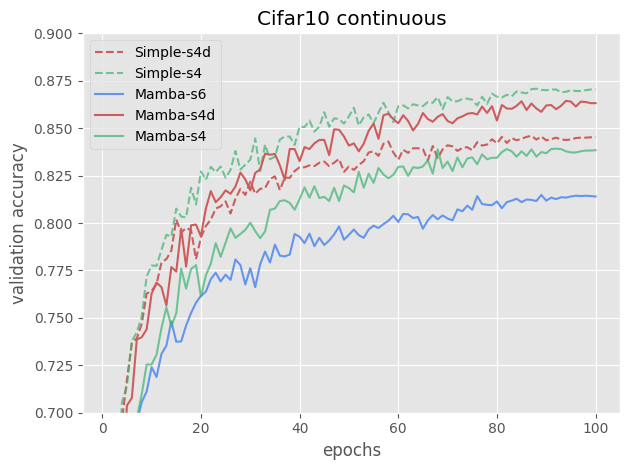

In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
colors = {'Simple-s4d':"indianred", 
          'Simple-s4':"mediumseagreen", 
          'Mamba-s6':"cornflowerblue",
          'Mamba-s4d':"indianred", 
          'Mamba-s4':"mediumseagreen"}

def basic_plotter(df, plot_name=None, lim=(0.7, 0.9)):
    fig = plt.figure()
    e_r = range(1, len(df)+1)
    for name in list(df.columns):
        ls = "--" if "Simple" in name else "-"
        alpha = 0.7 if "mediumseagreen" in colors[name] else 1.0
        plt.plot(e_r, df[name], color=colors[name], linestyle=ls, alpha=alpha, label=name)
       
    plt.ylim(lim)
    plt.xlabel("epochs")
    plt.ylabel("validation accuracy")
    if plot_name is not None:
        plt.title(plot_name)
    plt.legend()
    save_fig_name = plot_name + ".png" if plot_name is not None else "tmp.png"
    save_fig_name = "data/exp1/" + save_fig_name
    plt.tight_layout()
    plt.savefig(save_fig_name, dpi=200)
    print(plot_name, ": ",df.file_name)
    final = {name:df[name].values[-1] for name in list(df.columns) }
    print({key: str(val)[:5] for key, val in final.items()})
    return final

df = rename_columns(path = "data/cifar10_cons.csv")
_ = basic_plotter(df, "Cifar10 continuous")

Cifar10 continuous :  data/cifar10_cons.csv
{'Simple-s4d': '0.845', 'Simple-s4': '0.870', 'Mamba-s6': '0.814', 'Mamba-s4d': '0.863', 'Mamba-s4': '0.838'}
Cifar10 discrete :  data/cifar10_token.csv
{'Simple-s4d': '0.739', 'Simple-s4': '0.724', 'Mamba-s6': '0.698', 'Mamba-s4d': '0.781', 'Mamba-s4': '0.753'}
IMDB :  data/imdb.csv
{'Simple-s4d': '0.755', 'Simple-s4': '0.792', 'Mamba-s6': '0.895', 'Mamba-s4d': '0.889', 'Mamba-s4': '0.899'}
Fathfinder continuous :  data/pathfinder_cons.csv
{'Simple-s4d': '0.918', 'Simple-s4': '0.862', 'Mamba-s6': '0.740', 'Mamba-s4d': '0.958', 'Mamba-s4': '0.856'}
Fathfinder discrete :  data/pathfinder_token.csv
{'Simple-s4d': '0.970', 'Simple-s4': '0.972', 'Mamba-s6': '0.935', 'Mamba-s4d': '0.969', 'Mamba-s4': '0.955'}
{'Simple-s4d': 0.8571028491424572, 'Simple-s4': 0.8786128799773323, 'Mamba-s6': 0.8817022657799557, 'Mamba-s4d': 0.9075861666416655, 'Mamba-s4': 0.8980092624631232}


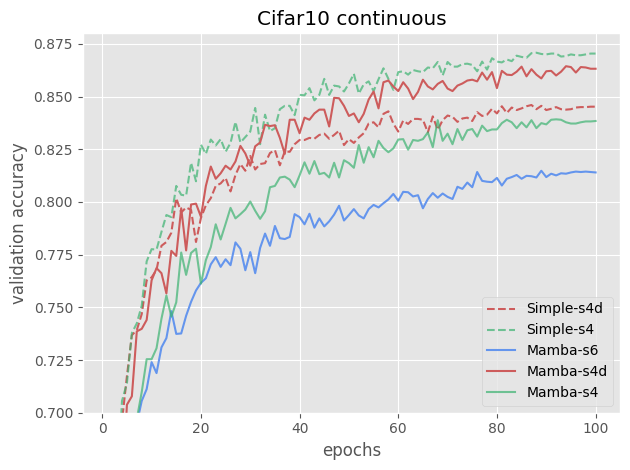

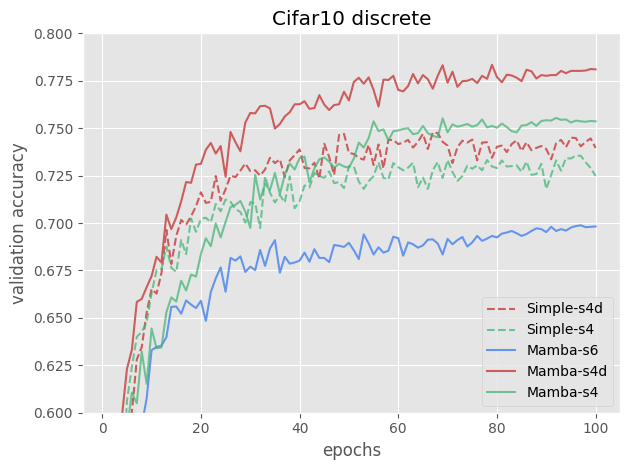

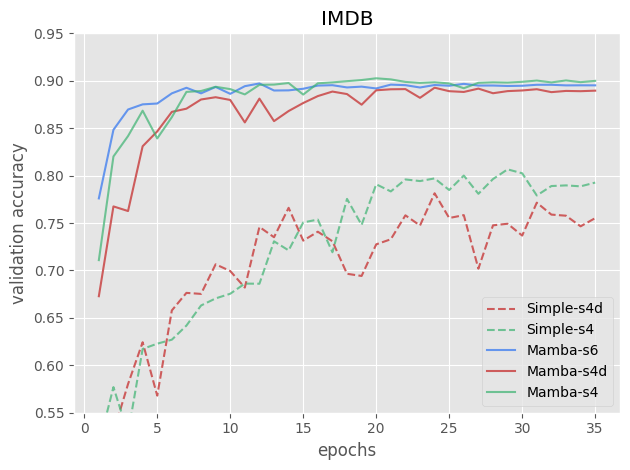

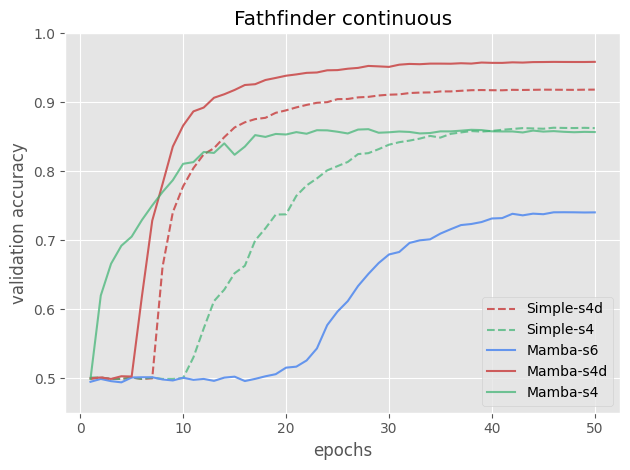

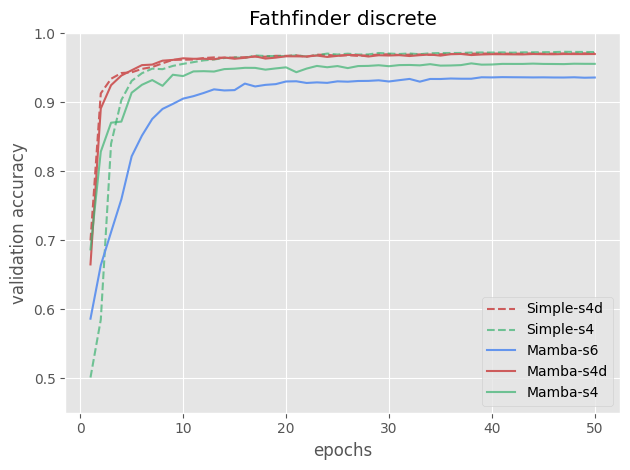

In [8]:
csvs = ["data/cifar10_cons.csv", "data/cifar10_token.csv", "data/imdb.csv","data/pathfinder_cons.csv", "data/pathfinder_token.csv"]
names = ["Cifar10 continuous", "Cifar10 discrete", "IMDB", "Fathfinder continuous", "Fathfinder discrete"]
lims = [(0.7, 0.88), (0.6, 0.8), (0.55, 0.95), (0.45, 1.0), (0.45, 1.0)]


for idx, (csv, name, lim) in enumerate(zip(csvs, names, lims)):
    df = rename_columns(csv)
    if idx == 0:
        running_avg = basic_plotter(df, plot_name=name, lim=lim)
    else:
        running_avg_ = basic_plotter(df, plot_name=name, lim=lim)
        if name != "Fathfinder continuous" and name != "Cifar10 discrete":
            for name in running_avg.keys():
                running_avg[name] += running_avg_[name]
             

for name in running_avg.keys():
    running_avg[name] = running_avg[name] / 3
print(running_avg)
        
       

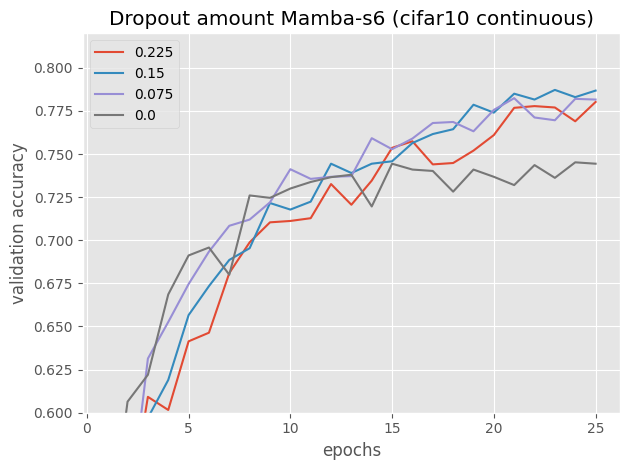

In [6]:
import re
df = pd.read_csv("data/s6_dropout_exp.csv")
df = df.drop(["Step"], axis='columns')
min_max = [col for col in list(df.columns) if "MIN" in col or "MAX" in col]
df = df.drop(min_max, axis='columns')
df.head()

plt.plot(range(1,26), df)
vals = [re.findall("\d+\.\d+", dropout)[0] for dropout in list(df.columns)]
#vals = ["0.0","0.075", "0.15", "0.225"]
#vals.reverse()
plt.legend(vals)
plt.xlabel("epochs")
plt.ylabel("validation accuracy")
plt.ylim(0.6, 0.82)
plt.title("Dropout amount Mamba-s6 (cifar10 continuous)")
plt.tight_layout()
plt.savefig("data/exp1/Mamba_s6_dropout.png", dpi=200)

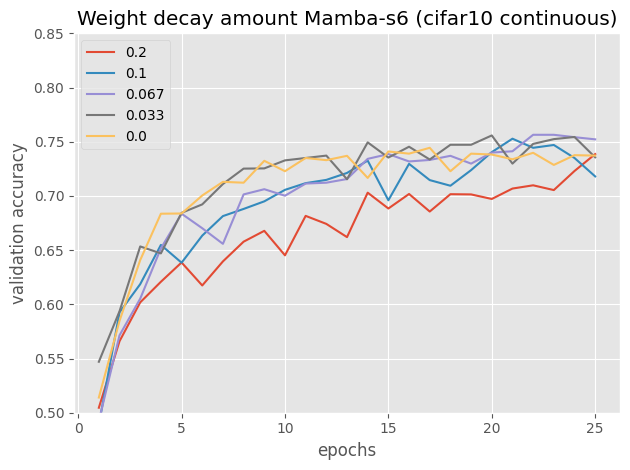

In [7]:
df = pd.read_csv("data/s6_weight_decay_exp.csv")
df = df.drop(["Step"], axis='columns')
min_max = [col for col in list(df.columns) if "MIN" in col or "MAX" in col]
df = df.drop(min_max, axis='columns')
df.head()

plt.plot(range(1,26), df)
vals = [re.findall("\d+\.\d+", dropout)[0] for dropout in list(df.columns)]
#vals = ["0.0","0.075", "0.15", "0.225"]
#vals.reverse()
plt.legend(vals)
plt.xlabel("epochs")
plt.ylabel("validation accuracy")
plt.ylim(0.5, 0.85)
plt.title("Weight decay amount Mamba-s6 (cifar10 continuous)")
plt.tight_layout()
plt.savefig("data/exp1/Mamba_s6_weightdecay.png", dpi=200)